In [1]:
import pandas as pd
import networkx as nx
import numpy as np

# chords and lyrics from https://tabs.ultimate-guitar.com/tab/keane/somewhere-only-we-know-chords-109970

# song and video at https://youtu.be/Oextk-If8HQ

In [2]:
# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

In [3]:
def tokenize(text):

    text = text.replace('\n', ' ').replace(',', '').replace('?', '')
    tokens = text.split()
    
    return tokens

In [4]:
def convert_tokens_to_edgelist(tokens):

    edge_list = []

    for i in range(len(tokens) - 1):
        current_token = tokens[i]
        next_token = tokens[i + 1]
        edge_list.append((current_token, next_token))
        
    df = pd.DataFrame(edge_list)
    df.columns = ['source', 'target']
        
    return df

# Song/Word Graph

Songs and text can be converted into networks and inspected or used.

In [5]:
lyrics = """I walked across an empty land
I knew the pathway like the back of my hand
I felt the earth beneath my feet
Sat by the river and it made me complete
Oh, simple thing, where have you gone?
I'm getting old, and I need something to rely on
So, tell me when you're gonna let me in
I'm getting tired, and I need somewhere to begin
I came across a fallen tree
I felt the branches of it looking at me
Is this the place we used to love?
Is this the place that I've been dreaming of?
Oh, simple thing, where have you gone?
I'm getting old, and I need something to rely on
So, tell me when you're gonna let me in
I'm getting tired, and I need somewhere to begin
And if you have a minute, why don't we go
Talk about it somewhere only we know?
This could be the end of everything
So, why don't we go somewhere only we know?
Somewhere only we know
Oh, simple thing, where have you gone?
I'm getting old, and I need something to rely on
So, tell me when you're gonna let me in
I'm getting tired, and I need somewhere to begin
And if you have a minute, why don't we go
Talk about it somewhere only we know?
This could be the end of everything
So, why don't we go?
So, why don't we go?
Ooh, oh-oh
Ah, oh
This could be the end of everything
So, why don't we go somewhere only we know?
Somewhere only we know
Somewhere only we know"""

In [6]:
lyric_tokens = tokenize(lyrics)
lyric_tokens[0:16]

['I',
 'walked',
 'across',
 'an',
 'empty',
 'land',
 'I',
 'knew',
 'the',
 'pathway',
 'like',
 'the',
 'back',
 'of',
 'my',
 'hand']

In [7]:
df = convert_tokens_to_edgelist(lyric_tokens)
df.head()

,source,target
0,I,walked
1,walked,across
2,across,an
3,an,empty
4,empty,land


In [8]:
G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph)

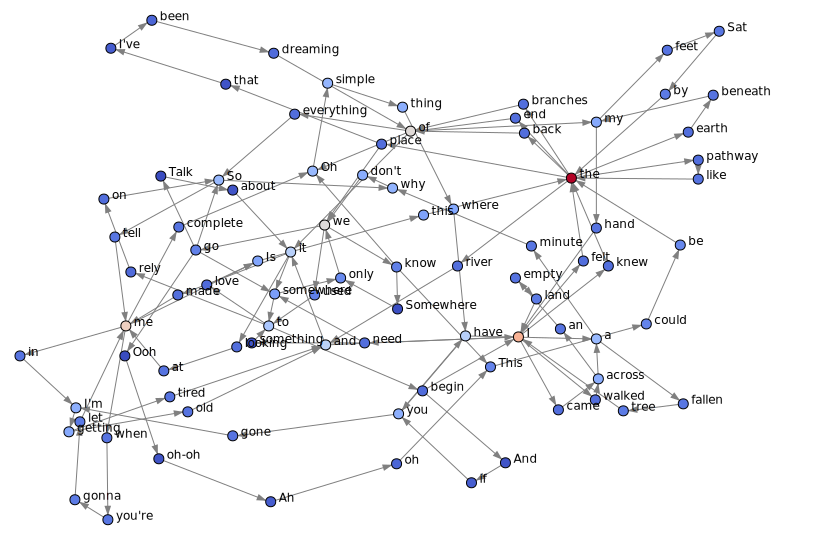

In [9]:
draw_graph(G, node_size=5, show_names=True, edge_width=1, font_size=12)

# Chord Graph

In [10]:
chords = """C C/B Dm Gsus4 G
C C/B Dm Gsus4 G
Am Em Dm F G
Am Em Dm F G
C C/B Dm Gsus4 G
C C/B Dm Gsus4 G
Am Em Dm F G
Am Em Dm F G
F C G
F C G
Dm Em Dm
Em Dm G
Am Em Dm F G
Am Em Dm F G
Dm C/E G
Dm C/E G
Dm C/E G
Dm Em
Dm C G
Dm C G
Dm C G
Dm Em C Dm
Em Dm C
"""

In [11]:
chord_tokens = tokenize(chords)
chord_tokens[0:5]

['C', 'C/B', 'Dm', 'Gsus4', 'G']

In [12]:
df = convert_tokens_to_edgelist(chord_tokens)
df.head()

,source,target
0,C,C/B
1,C/B,Dm
2,Dm,Gsus4
3,Gsus4,G
4,G,C


In [13]:
G = nx.from_pandas_edgelist(df, create_using=nx.DiGraph)

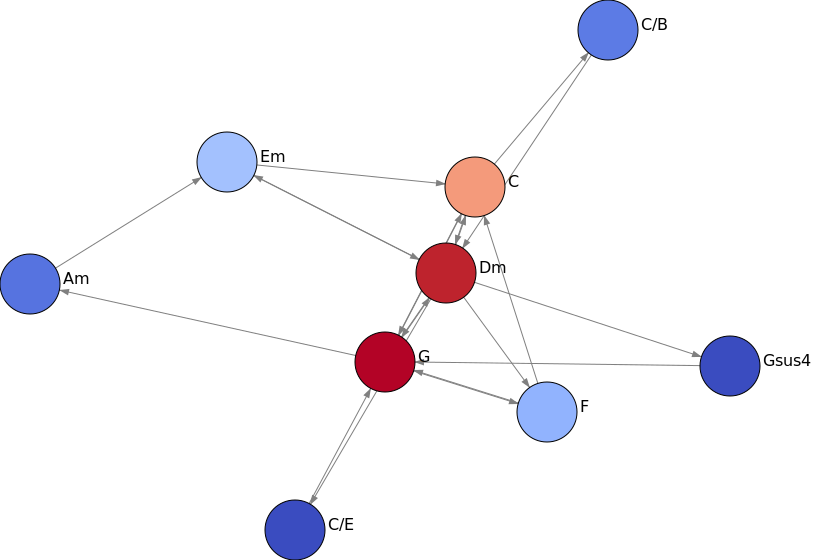

In [14]:
draw_graph(G, node_size=30, show_names=True, edge_width=1, font_size=16)